# Project: Investigate brazilian No-Shows

The no-show appointments dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In this section we will load the data and look at it from different angles to figure out it's properties and what we need to change in order to work conveniently with the data.

In [5]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv') # load the data set
df.head() # print first line of data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.shape

(110527, 14)

In [7]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no empty values in the data set. But No-Shows are saved as strings. We will have to save them as booleans.

In [9]:
print('There are {} duplicated rows in the data set'.format(df.duplicated().sum()))

There are 0 duplicated rows in the data set


In [10]:
# going through unique values of each column to see if there are some weird or conspicious items inside
for x in df.columns:
    print(x, df[x].unique())

PatientId [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
AppointmentID [5642903 5642503 5642549 ... 5630692 5630323 5629448]
Gender ['F' 'M']
ScheduledDay ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
Age 

The age range from -1 to 115 seems to be problematic.

And Handcap [sic!] is not a boolean value but a count.

### Data Cleaning 
For the analysis we are going to do we can drop the columns Patient ID and Appointment ID. We should also change the headers of our columns to be lower case and replace "-" with "_". 
This will make it easier to work with our data.

"Handcap" seems to be misspelled, so we will fix that too.
Also we will replace the string values from the no_show and gender column with boolean values and drop the duplicated rows as well as converting scheduledday and appointmentday column into datetime objects.

From the exploration we also know that our age values range from -1 to 115 which is impossible in the case of -1 and implausible for the case of 115. We will therefore trim the age data from 0 till 99.

Finally we will ad a new column to our DataFrame containing the period of time between scheduledday and appointmentday.

In [11]:
df.columns = df.columns.str.lower()
df.rename(columns={'no-show': 'no_show', 'handcap': 'handicap'}, inplace=True) # renaming columns
df['no_show'] = df['no_show'].map({'Yes': 1, 'No': 0}) # replacing strings with booleans
df['gender'] = df['gender'].map({'M': 1, 'F': 0})

In [12]:
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True) # dropping unnecessary columns

In [13]:
df = df[(df.age >= 0) & (df.age <= 99)] # trim age data

In [14]:
df['scheduledday'] = df['scheduledday'].map(lambda x: x[:10]) # conversion into date
df['appointmentday'] = df['appointmentday'].map(lambda x: x[:10])
df['scheduledday'] = df['scheduledday'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))
df['appointmentday'] = df['appointmentday'].map(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [15]:
df['queue_time'] = df['appointmentday'] - df['scheduledday'] # new column for queue time

Let's check our changes:

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110515 entries, 0 to 110526
Data columns (total 13 columns):
gender            110515 non-null int64
scheduledday      110515 non-null datetime64[ns]
appointmentday    110515 non-null datetime64[ns]
age               110515 non-null int64
neighbourhood     110515 non-null object
scholarship       110515 non-null int64
hipertension      110515 non-null int64
diabetes          110515 non-null int64
alcoholism        110515 non-null int64
handicap          110515 non-null int64
sms_received      110515 non-null int64
no_show           110515 non-null int64
queue_time        110515 non-null timedelta64[ns]
dtypes: datetime64[ns](2), int64(9), object(1), timedelta64[ns](1)
memory usage: 11.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis

In [17]:
no_show = 0
for x in df.no_show:
    if x == 1:
        no_show += 1
print('The ratio of no show patients is {} %'.format(round((no_show/len(df.no_show))*100, 2)))

The ratio of no show patients is 20.19 %


Let's look at how this looks in a pie chart:

In [18]:
no_show_count = df.no_show[df['no_show'] == 1].count() # calculating the count of no show patients
df_no_show_count = pd.DataFrame([len(df) - no_show_count, no_show_count], ['Show', 'No show'])
df_no_show_count.columns = ['Ratio']

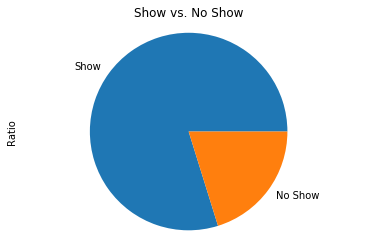

In [19]:
df_no_show_count['Ratio'].plot(kind='pie', title='Show vs. No Show', labels=['Show', 'No Show']);
plt.axis('equal');

### Research Question 1: Quantitative differences between the shows and no shows
To figure this out we will compare the sample mean (people who didn't show up to their docotrs appointments) to the population mean (whole data set, so both people who showed up and didn't show up to the doctor's appointment).

In [20]:
# drop columns with qualitative data
columns = df.drop(['scheduledday', 'appointmentday', 'neighbourhood', 'no_show'], axis=1).columns 

In [21]:
df_no_show = df[columns].loc[df['no_show'] == 1] # DataFrame of Patients who didn't show up to their appointments
df_show = df[columns].loc[df['no_show'] == 0] # DataFrame of Patients who showed up to their appointments

To explain the methodology we will first look at the age data:

In [22]:
df_show['age'].mean() # average age of all the patients in the dataset

37.78447601446729

In [23]:
df_no_show['age'].mean() # average age of the patients who didn't show up to their appointments

34.30682021867718

In [24]:
df_no_show['age'].mean() - df_show['age'].mean()

-3.477655795790106

The no show patients from the dataset were on average slightly younger than the pathients who showed up

In [25]:
for x in columns:
    print(x, df_no_show[x].mean())

gender 0.3461641871303101
age 34.30682021867718
scholarship 0.11552249507080121
hipertension 0.16902670729521418
diabetes 0.06407958415486646
alcoholism 0.030336977953038177
handicap 0.020164904104678257
sms_received 0.4384298261337157
queue_time 15 days 19:57:34.167413


In [26]:
for x in columns:
    print(x, df_show[x].mean())

gender 0.35102438803161035
age 37.78447601446729
scholarship 0.0939126293948911
hipertension 0.20440141044683047
diabetes 0.07384437465277384
alcoholism 0.03041984603000034
handicap 0.02271000804997789
sms_received 0.291341171668613
queue_time 8 days 18:07:00.984364


In [27]:
for x in columns:
    print(x, df_no_show[x].mean() - df_show[x].mean())

gender -0.004860200901300238
age -3.477655795790106
scholarship 0.02160986567591011
hipertension -0.03537470315161628
diabetes -0.009764790497907377
alcoholism -8.286807696216217e-05
handicap -0.0025451039452996337
sms_received 0.14708865446510272
queue_time 7 days 01:50:33.183048


Age and queue_time seem to have the biggest influence on the outcome if a patient shows up to a doctor's appointment or not. People who didn't show up to their appointments were on average three years younger and waited on average 7 days longer for their appointment.

Let's investigate the age data a bit more:

In [28]:
df_no_show_age = df[['age', 'no_show']].copy() # New DataFrame of age and no show data
df_no_show_age = df[['age', 'no_show']].groupby('age').sum() # Calculating no show counts by age

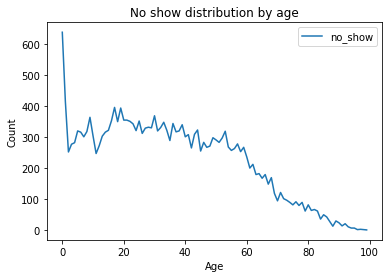

In [30]:
df_no_show_age.plot(title='No show distribution by age'); # Plotting no shouw counts by age
plt.ylabel('Count');
plt.xlabel('Age');

We can see on the graph above that a lot of no show patients were in an infant age.

Maybe this has to do with the ratio of infants in our data set. 

In [33]:
df_age_dist = df[['age', 'no_show']].groupby('age').count() # calculating the distribution of ages in the data set

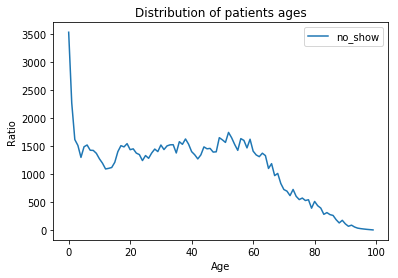

In [34]:
df_age_dist.plot(title='Distribution of patients ages'); # plotting the distribution of ages in the data set
plt.ylabel('Ratio');
plt.xlabel('Age');

With the Distribution of patients ages we can see that there are significantly more infants in the data set
than other age groups. 

In [36]:
df_no_show_age['no_show'] = df_no_show_age['no_show'] / df_age_dist['no_show']

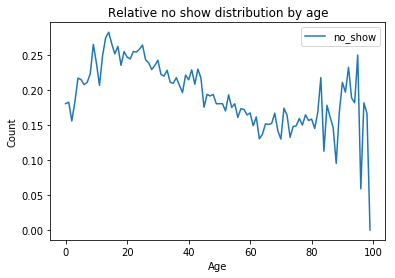

In [37]:
df_no_show_age.plot(title='Relative no show distribution by age'); #create a graph
plt.ylabel('Count');
plt.xlabel('Age');

With the relative no show distribution we can deduce that infants are not significantyl less likely to show up to there doctos appointments than other age groups.

### Research Question: Qualitative differences between the shows and no shows
For this analysis let's look at the location of the hospital and see if it has an influence on the show to no show ratio.

In [38]:
# filtering out any locations have less than 50 entries to avoid outliers
df_loc = df[['neighbourhood', 'no_show']].groupby('neighbourhood').filter(lambda x: len(x) >= 50)

In [40]:
df_loc = df_loc.groupby('neighbourhood').mean() # checking out min max values
df_loc.describe()

,no_show
count,76.000000
mean,0.200386
std,0.028261
min,0.145553
25%,0.180760
50%,0.197650
75%,0.217709
max,0.289185


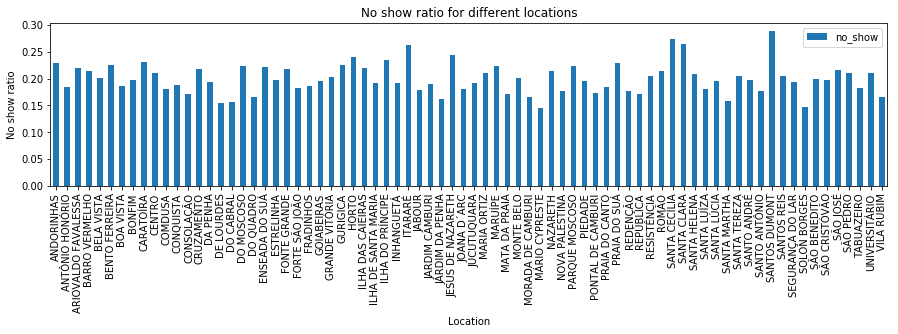

In [42]:
# plotting no show ratio by hospital lcocation
df_loc.plot(kind='bar', figsize=(15, 3), title='No show ratio for different locations');
plt.ylabel('No show ratio');
plt.xlabel('Location');

The different locations seem to have a big differences at the no show ratio. The range goes from under 15 % to almost 30 %.

<a id='conclusions'></a>
## Conclusions
From the data  we can conclud that various features effect if a patient shows up to his appointment. Some features have very small influence like wether or not the patient receives an SMS as an reminder.
Other features seem to have a bigger influence as for example the age of patient whereas older patients seem to attend their appointments more reliably as well as the location of the hospital.

## Limitations
It is difficult to draw any conclusin without looking on the propability of the researched features. 
In the quantitative section we would have to calculate if the difference between the sample and population mean could be caused by standard deviation or are in face statistically relevant.

Also there are many more angles to look at this data. For example it could be interesting to look at for which day of the week the doctors appointment was scheduled. Or to deep dive a bit further into some of the qualitative features.

In [43]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0